In [7]:
import requests as r
def no_of_freelancers(country):
    
    url = f"https://www.freelancer.in/ajax/directory/getFreelancer.php?countries%5B%5D={country}&limit=1"
    x = r.get(url).json()
    count = 0
    if x['status'] == 'success':
        count = x['count']
        
        
    print((country, count))
    DATA.append({'Country': country, "Total Freelancers": count})


In [46]:
url = f"https://www.freelancer.in/ajax/directory/getFreelancer.php?countries%5B%5D=India&limit=1"
x = r.get(url).json()
len(x['users'])

1

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('./output.xlsx')

In [6]:
countries = df.country.unique()
countries

array(['Bangladesh', 'Argentina', 'India', 'Jamaica', 'Pakistan',
       'Greece', 'Indonesia', 'Philippines', 'Sri Lanka', 'Canada',
       'Nepal', 'Ukraine', 'Croatia', 'Tunisia', 'Serbia', 'Turkey',
       'Portugal', 'Romania', 'Bosnia and Herzegovina', 'Lebanon',
       'Algeria', 'Egypt', 'United Arab Emirates', 'Colombia', 'Thailand',
       'Zambia', 'United States', 'Chile', 'Afghanistan', 'Saudi Arabia',
       'Kenya', 'Australia', 'Taiwan', 'Venezuela', 'Iraq', 'Nigeria',
       'Jordan', 'Belarus', 'Vietnam', 'Italy', 'Morocco', 'Kazakhstan',
       'Czech Republic', 'Mexico', 'Bahrain', 'Spain', 'Ethiopia',
       'Bulgaria', 'Barbados', 'Peru', 'Ecuador', 'United Kingdom',
       'Russian Federation', 'Germany', 'Brazil', 'Armenia',
       'Moldova, Republic of', 'China', 'Bolivia', 'Azerbaijan',
       'Singapore', 'France', 'Malta', 'Georgia', 'El Salvador',
       'Paraguay', 'Hong Kong', 'Poland', 'Honduras', 'Mauritius',
       'Austria', 'Sweden', 'Montenegro', 'T

In [8]:
from concurrent.futures import ThreadPoolExecutor

DATA = []
with ThreadPoolExecutor() as ex:
    ex.map(no_of_freelancers, countries)
    
# for country in:
#     print(country)
    

('Jamaica', 2906)
('Greece', 6415)
('Bangladesh', 202640)('Indonesia', 141444)
('Argentina', 64187)('Pakistan', 369673)

('India', 1686167)

('Canada', 24827)
('Philippines', 123210)
('Ukraine', 16344)
('Serbia', 8243)
('Turkey', 73631)
('Nepal', 32071)
('Bosnia and Herzegovina', 3573)
('Romania', 17460)
('Lebanon', 8415)
('Portugal', 12825)
('United Arab Emirates', 19285)
('Algeria', 15474)
('Croatia', 2896)
('Tunisia', 9322)
('Sri Lanka', 44615)
('Colombia', 50417)
('Zambia', 1778)
('Kenya', 43327)
('Saudi Arabia', 16395)
('Chile', 9948)
('Afghanistan', 2512)
('United States', 117368)
('Australia', 15832)
('Taiwan', 1522)
('Iraq', 5566)
('Egypt', 125784)
('Vietnam', 40283)
('Thailand', 3609)
('Italy', 25055)
('Kazakhstan', 2497)
('Jordan', 5828)
('Nigeria', 70076)
('Czech Republic', 2260)
('Mexico', 42206)
('Bahrain', 1495)
('Morocco', 27977)
('Ethiopia', 6759)
('Venezuela', 30333)
('Belarus', 3376)
('Barbados', 153)
('Ecuador', 9958)
('Spain', 27992)
('United Kingdom', 33318)
('Bulg

In [14]:
df1 = pd.DataFrame(DATA)
df1 = df1.sort_values('Total Freelancers', ascending=False)
df1


,Country,Total Freelancers
5,India,1686167
6,Pakistan,369673
2,Bangladesh,202640
4,Indonesia,141444
32,Egypt,125784
...,...,...
122,Bhutan,357
106,Tajikistan,337
87,Luxembourg,285
123,Swaziland,190


In [16]:
df1.to_csv('freelancer_count_by_country.csv', index=False)

In [26]:
df1['Total Freelancers'].sum()
total_freelancers_worldwide = 4073892
# 4051240

In [94]:
df1['percent'] = (df1['Total Freelancers']/total_freelancers_worldwide)*100
df1[:10]

,Country,Total Freelancers,percent
5,India,1686167,41.389585
6,Pakistan,369673,9.074197
2,Bangladesh,202640,4.974113
4,Indonesia,141444,3.471962
32,Egypt,125784,3.087563
61,Brazil,123830,3.039599
8,Philippines,123210,3.024381
28,United States,117368,2.880980
11,Turkey,73631,1.807387
38,Nigeria,70076,1.720124


In [147]:
df2 = df1[:20]#df1[df1.percent>=0.5]

remain_percent = 100 - df2.percent.sum()
remain_freel = total_freelancers_worldwide - df2['Total Freelancers'].sum()

df3 = df2.append({'Country': 'Other (>100 Countries)', 'Total Freelancers': remain_freel, "percent":remain_percent}, ignore_index=True)
df3

In [99]:
# df3.plot.pie(x='Country',y='percent',figsize=(20,20),fontsize=13, autopct='%1.0f%%')
# df3 = df3.pivot_table(index='Country', values='percent').sort_values('percent', ascending=False)

In [192]:
# len(df1)-10
# len(df1[df1.percent>=0.5]
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [232]:
# df3
# df3.plot.pie(x='Country',y='percent',figsize=(20,20),fontsize=13, autopct='%1.1f%%',startangle=0)


Text(0.5, 1.0, 'Freelancer Population by Country')

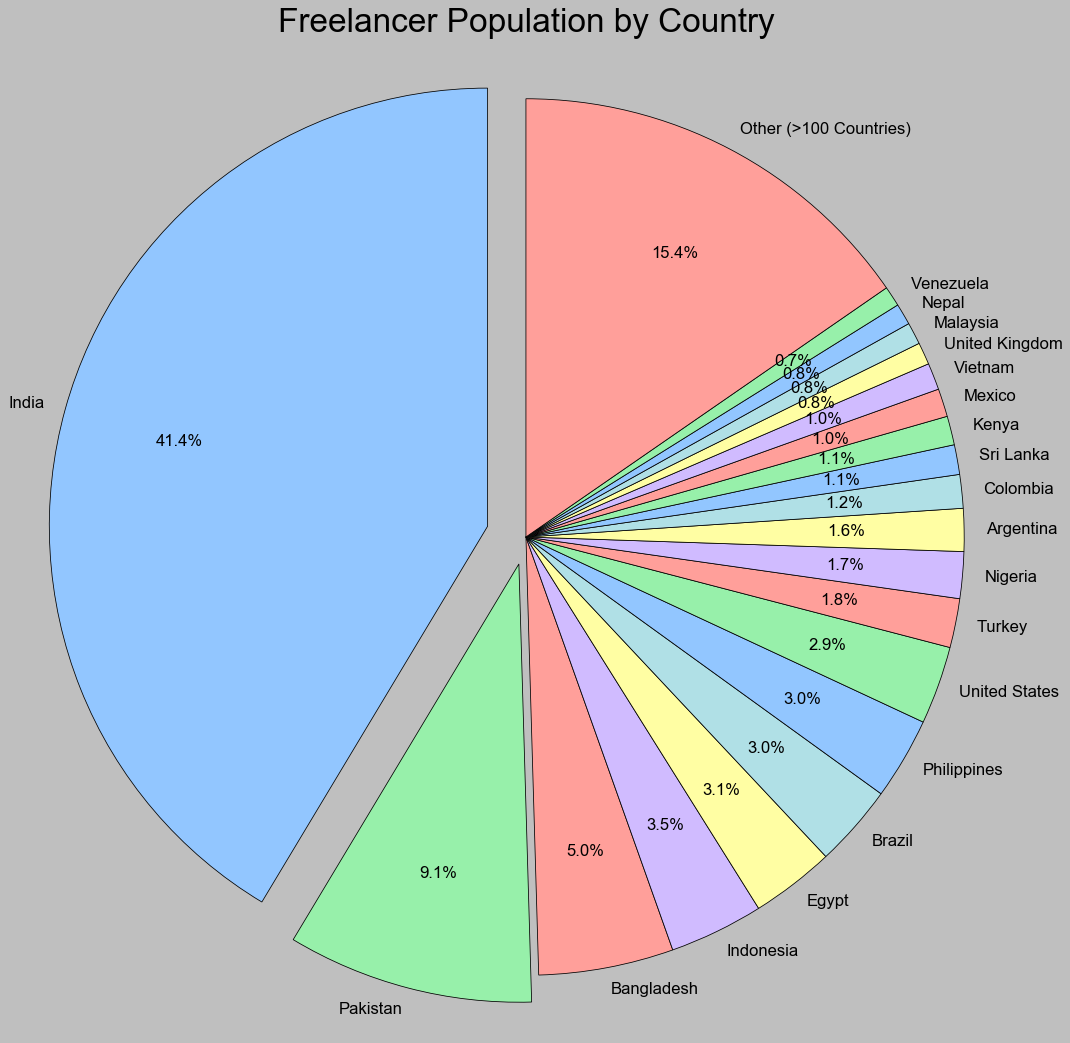

In [279]:
plt.style.use('seaborn-pastel')
fig = plt.figure(figsize=(15, 15))

plt.pie(x=df3.percent, labels=df3.Country, explode=[0.1,0.07]+[0]*19, autopct='%1.1f%%',startangle=90,pctdistance=0.73,
       textprops={'fontsize': 15},labeldistance=1.05, radius=1.1, wedgeprops = {'linewidth': 0.7})
# plt.legend(fontsize=12)
plt.title("Freelancer Population by Country", fontsize=30)

# plt.show()

In [282]:
fig.savefig('pie chart.jpg', dpi=150)